In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
# Loading the dataset that I saved by giving exact path
df = pd.read_csv("C:\\Users\\Admin\\OneDrive\\photos\\Air_Quality_Dataset.csv")
print("Shape:", df.shape)
df.head()

Shape: (43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [11]:
# Combining year, month, day, hour into datetime
if all(col in df.columns for col in ['year','month','day','hour']):
    df['datetime'] = pd.to_datetime(df[['year','month','day','hour']])
    df.set_index('datetime', inplace=True)
    df.drop(['No','year','month','day','hour'], axis=1, inplace=True, errors='ignore')
df.head()
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64


In [12]:
# Forward fill missing values
df.fillna(method='ffill', inplace=True)

# Alternatively, fill PM2.5 only with median (uncomment if needed)
# if "pm2.5" in df.columns:
#     df['pm2.5'].fillna(df['pm2.5'].median(), inplace=True)
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 14


C:\Users\Admin\AppData\Local\Temp\ipykernel_16672\3365968274.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
df.replace({'Nw':np.nan}, inplace=True)

In [20]:
rows_with_Nw = df[df.isin(['Nw']).any(axis=1)]

if not rows_with_Nw.empty:
    print("The string 'Nw' was found in these rows:")
    print(rows_with_Nw)
else:
    print("The string 'Nw' was not found. The DataFrame is clean.")

The string 'Nw' was not found. The DataFrame is clean.


C:\Users\Admin\AppData\Local\Temp\ipykernel_16672\3906149893.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pm2.5'].ffill(inplace=True)


              pm2.5          DEWP          TEMP          PRES           Iws  \
count  43786.000000  43810.000000  43810.000000  43810.000000  43810.000000   
mean      97.788494      1.815111     12.447523   1016.448665     23.896203   
std       91.408828     14.433141     12.199248     10.269068     50.017056   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       29.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       72.000000      2.000000     14.000000   1016.000000      5.370000   
75%      136.000000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    585.600000   

                 Is            Ir  
count  43810.000000  43810.000000  
mean       0.052751      0.194978  
std        0.760496      1.416089  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  


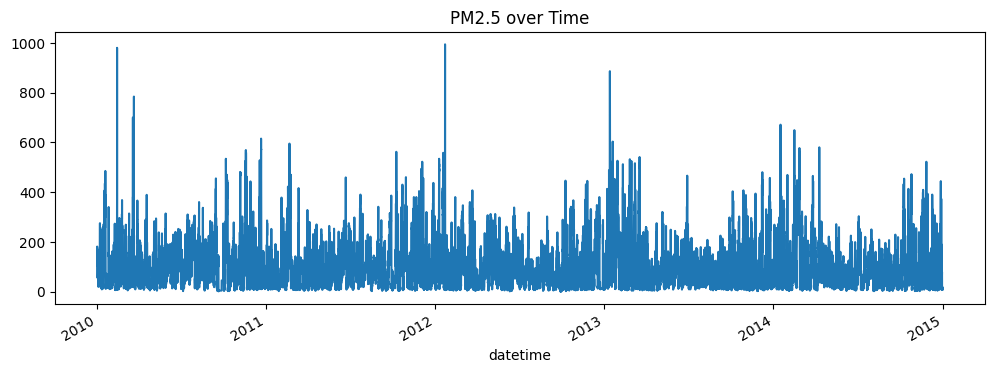

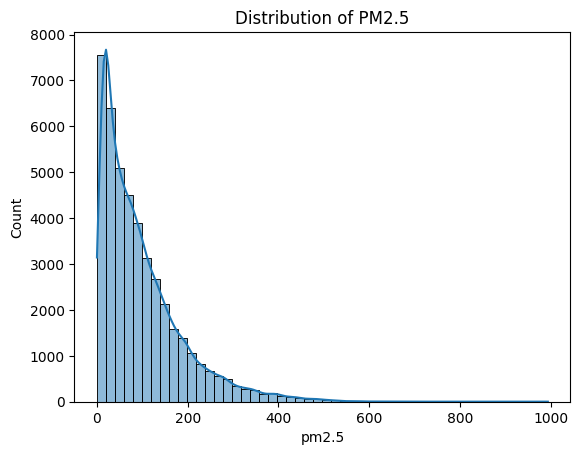

ValueError: could not convert string to float: 'NW'

<Figure size 800x500 with 0 Axes>

In [13]:
# Example: set negative PM2.5 values to NaN, then forward fill
if "pm2.5" in df.columns:
    df.loc[df['pm2.5'] < 0, 'pm2.5'] = np.nan
    df['pm2.5'].ffill(inplace=True)

# Summary statistics
print(df.describe())

# Time series plot (if pm2.5 exists)
if "pm2.5" in df.columns:
    df['pm2.5'].plot(figsize=(12,4), title="PM2.5 over Time")
    plt.show()

# Distribution of PM2.5
if "pm2.5" in df.columns:
    sns.histplot(df['pm2.5'], bins=50, kde=True)
    plt.title("Distribution of PM2.5")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(8,5))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

import os
df.to_csv("Clean_Air_Quality_Dataset.csv")
print("✅ Clean dataset saved as 'Clean_Air_Quality_Dataset.csv'")

current_directory = os.getcwd()
print("The file is saved in this folder:")
print(current_directory)

The file is saved in this folder:
C:\Users\Admin
